In [5]:
from glob import glob

hotdog_imgs = glob("archive/train/hot_dog/*.jpg")
print(len(hotdog_imgs))

notdog_imgs = glob("archive/train/not_hot_dog/*.jpg")
print(len(notdog_imgs))


249
249


In [6]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [7]:
path = r"/Users/yoonseonghyeon/Desktop/2022_STEAM/lierhero/archive/train/hot_dog"

os.chdir(path)

flowers = []

with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            flowers.append(file.name)
            
print(flowers[:10])

['3622018.jpg', '3503720.jpg', '3497633.jpg', '910098.jpg', '853994.jpg', '1186993.jpg', '923240.jpg', '3495622.jpg', '1226791.jpg', '127117.jpg']


In [10]:
img = load_img(flowers[0], target_size=(224, 224))

img = np.array(img)

print(img.shape)

reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

x = preprocess_input(reshaped_img)

(224, 224, 3)
(1, 224, 224, 3)


In [12]:
model = VGG16()

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [14]:
features = model.predict(reshaped_img)
print(features.shape)

(1, 4096)


In [15]:
# Extract Images Features
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [16]:
# Importing the dataset from keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

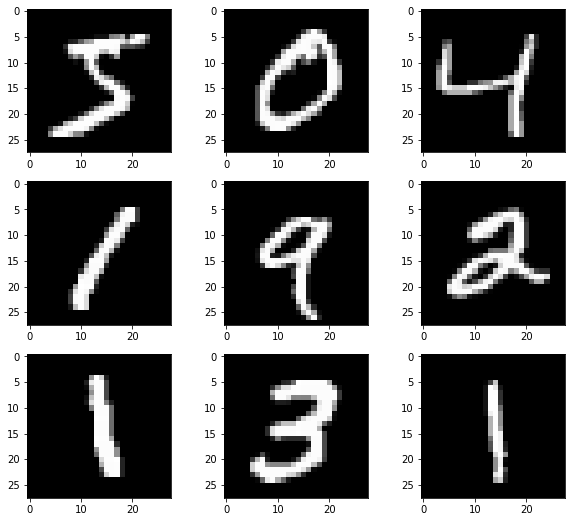

In [21]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9))
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [25]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [26]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [27]:
kmeans.labels_

array([1, 8, 0, ..., 1, 3, 1], dtype=int32)

In [29]:
def retrieve_info(cluster_labels,y_train):
    # Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    print(reference_labels)
    return reference_labels

In [31]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

{0: 4, 1: 8, 2: 1, 3: 6, 4: 7, 5: 3, 6: 3, 7: 1, 8: 0, 9: 2}


In [32]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5966
